In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/mushroom-classification/mushrooms.csv


In [5]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### Let's make the legend a bit more readable
</br>
Note for later: stalk-root has missing values, deal with them!

- class: 
    - edible=e, 
    - poisonous=p
</br>
- cap-shape: 
    - bell=b,
    - conical=c,
    - convex=x,
    - flat=f, 
    - knobbed=k,
    - sunken=s
</br>
</br>
- cap-surface: 
    - fibrous=f,
    - grooves=g,
    - scaly=y,
    - smooth=s
</br>
</br>
- cap-color: 
    - brown=n,
    - buff=b,
    - cinnamon=c,
    - gray=g,
    - green=r,
    - pink=p,
    - purple=u,
    - red=e,
    - white=w,
    - yellow=y
</br>
</br>
- bruises: 
    - bruises=t,
    - no=f
</br>
</br>
- odor: 
    - almond=a,
    - anise=l,
    - creosote=c,
    - fishy=y,
    - foul=f,
    - musty=m,
    - none=n,
    - pungent=p,
    - spicy=s
</br>
</br>
- gill-attachment: 
    - attached=a,
    - descending=d,
    - free=f,
    - notched=n
</br>
</br>
- gill-spacing: 
    - close=c,
    - crowded=w,
    - distant=d
</br>
</br>
- gill-size: 
    - broad=b,
    - narrow=n
</br>
</br>
- gill-color: 
    - black=k,
    - brown=n,
    - buff=b,
    - chocolate=h,
    - gray=g, 
    - green=r,
    - orange=o,
    - pink=p,
    - purple=u,
    - red=e,
    - white=w,
    - yellow=y
</br>
</br>
- stalk-shape: 
    - enlarging=e,
    - tapering=t
</br>
</br>
- stalk-root: 
    - bulbous=b,
    - club=c,
    - cup=u,
    - equal=e,r
    - hizomorphs=z,
    - rooted=r,
    - missing=?
</br>
</br>
- stalk-surface-above-ring: 
    - fibrous=f,
    - scaly=y,
    - silky=k,
    - smooth=s
</br>
</br>
- stalk-surface-below-ring: 
    - fibrous=f,
    - scaly=y,
    - silky=k,
    - smooth=s
</br>
</br>
- stalk-color-above-ring: 
    - brown=n,
    - buff=b,
    - cinnamon=c,
    - gray=g,
    - orange=o,
    - pink=p,
    - red=e,
    - white=w,
    - yellow=y
</br>
</br>
- stalk-color-below-ring: 
    - brown=n,
    - buff=b,
    - cinnamon=c,
    - gray=g,
    - orange=o,
    - pink=p,
    - red=e,
    - white=w,
    - yellow=y
</br>
</br>
- veil-type: 
    - partial=p,
    - universal=u
</br>
</br>
- veil-color: 
    - brown=n,
    - orange=o,
    - white=w,
    - yellow=y
</br>
</br>
- ring-number: 
    - none=n,
    - one=o,
    - two=t
</br>
</br>
- ring-type: 
    - cobwebby=c,
    - evanescent=e,
    - flaring=f,
    - large=l,
    - none=n,
    - pendant=p,
    - sheathing=s,
    - zone=z
</br>
</br>
- spore-print-color: 
    - black=k,
    - brown=n,
    - buff=b,
    - chocolate=h,
    - green=r,
    - orange=o,
    - purple=u,
    - white=w,
    - yellow=y
</br>
</br>
- population: 
    - abundant=a,
    - clustered=c,
    - numerous=n,
    - scattered=s,
    - several=v,
    - solitary=y
</br>
</br>
- habitat: 
    - grasses=g,
    - leaves=l,
    - meadows=m,
    - paths=p,
    - urban=u,
    - waste=w,
    - woods=d

In [7]:
# Let's also make a dictionary out of it, I might need it later

legend = {
    'class': {'e': 'edible', 'p': 'poisonous'},
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'hizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}


# Dealing with missing values

We can see below that stalk-root as a lot of missing values, 2480 on 8124 total entries. Since it's more than 1/4 of the total values, I'm considering removing the whole column, but let's see first if the column is highly correlated with the target.

In [8]:
df['stalk-root'].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

To calculate the correlation between this feature and the target, I need to encode the data first. I prefer to avoid creating a huge number of new columns, therefore I will use the Label Encoder instead of the OneHotEncoder.

In [9]:
cols = df.columns.to_list()
encoded_data = pd.DataFrame()

label_encoder = LabelEncoder()
for col in cols:
    encoded_data[col] = label_encoder.fit_transform(df[col])

In [10]:
encoded_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


We can see below that 'stalk-root' and the target are negatively correlated and not much, so I think it's safer to completely remove the column instead of filling more than 25% of it with imputed values.

In [11]:
to_corr = encoded_data[['stalk-root', 'class']]
to_corr.corr()

,stalk-root,class
stalk-root,1.000000,-0.379361
class,-0.379361,1.000000


In [12]:
encoded_data = encoded_data.drop('stalk-root', axis=1)
df = df.drop('stalk-root', axis=1)
cols.remove('stalk-root')

# EDA
Now that there are not null values anymore, let's see the frequency of both values in 'class' (the target variable.
</br>
</br>
We can see that there is almost the same amount of edible mushrooms and edible ones. Thanks to this balanced distribution, there is no need of oversampling (SMOTE) or undersampling (Tomek Links) data, which are otherwise necessary steps in order to ensure fair results from the model we are going to create.

In [13]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

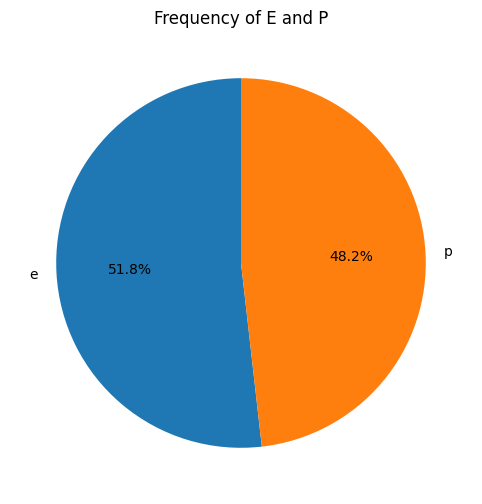

In [14]:
sizes = [4208, 3916]
labels = ['e', 'p']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Frequency of E and P')
plt.show()

Display a countplot in relation with the target variable, to see if some features are more likely to make the mushroom edible or not.
</br>
</br>

#### Some observations from the visualizations below:
- Most caps are either convex or flat
- Colors are mainly Brown, Gray, Yellow, White or Red
- Bruises and edibility are mostly related: if a mushroom has bruises, it's most probably edible, and vice-versa.
- Smell: if it's foul, it's almost always poisonus. If there is no smell, there is a big chance it's safe to eat.
- Almost all species in the sample have free gills
- Beware buff gills: they're very likely poisonus!
- Same with silky stalk surface above and below the ring

{'e': 'edible', 'p': 'poisonous'}

class
e    4208
p    3916
Name: count, dtype: int64



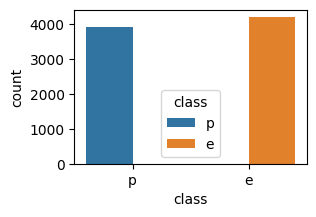



{'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64



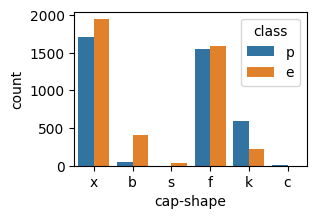



{'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'}

cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64



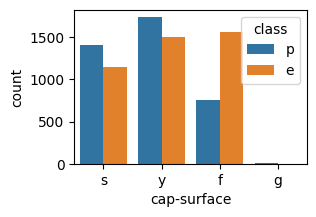



{'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64



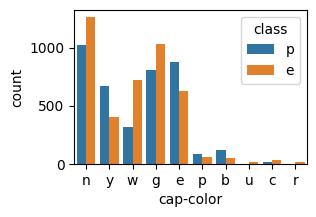



{'t': 'bruises', 'f': 'no'}

bruises
f    4748
t    3376
Name: count, dtype: int64



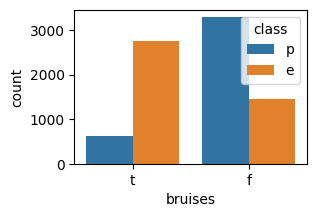



{'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'}

odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64



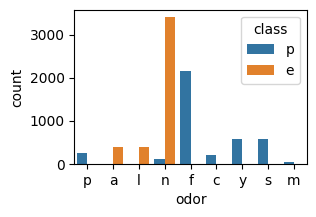



{'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'}

gill-attachment
f    7914
a     210
Name: count, dtype: int64



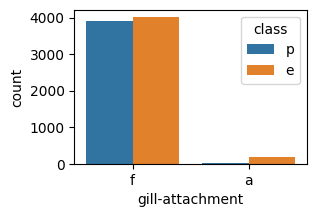



{'c': 'close', 'w': 'crowded', 'd': 'distant'}

gill-spacing
c    6812
w    1312
Name: count, dtype: int64



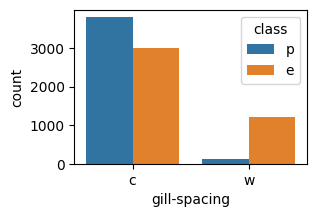



{'b': 'broad', 'n': 'narrow'}

gill-size
b    5612
n    2512
Name: count, dtype: int64



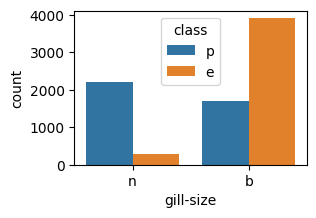



{'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64



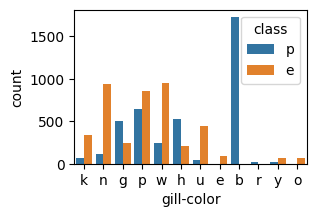



{'e': 'enlarging', 't': 'tapering'}

stalk-shape
t    4608
e    3516
Name: count, dtype: int64



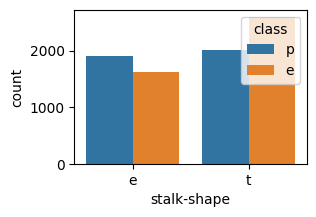



{'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}

stalk-surface-above-ring
s    5176
k    2372
f     552
y      24
Name: count, dtype: int64



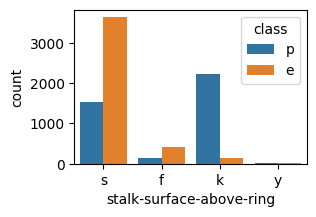



{'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}

stalk-surface-below-ring
s    4936
k    2304
f     600
y     284
Name: count, dtype: int64



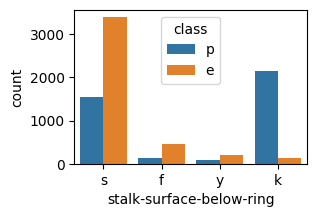



{'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}

stalk-color-above-ring
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: count, dtype: int64



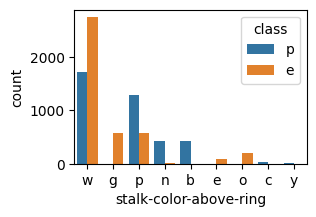



{'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}

stalk-color-below-ring
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: count, dtype: int64



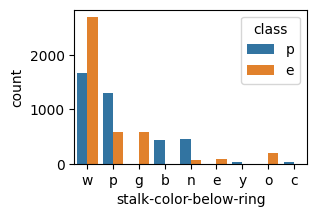



{'p': 'partial', 'u': 'universal'}

veil-type
p    8124
Name: count, dtype: int64



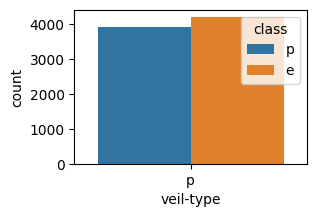



{'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}

veil-color
w    7924
n      96
o      96
y       8
Name: count, dtype: int64



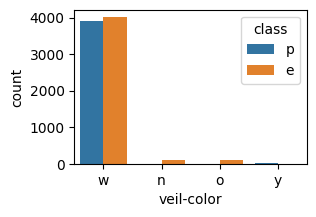



{'n': 'none', 'o': 'one', 't': 'two'}

ring-number
o    7488
t     600
n      36
Name: count, dtype: int64



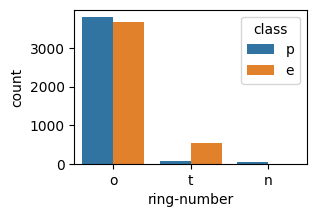



{'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'}

ring-type
p    3968
e    2776
l    1296
f      48
n      36
Name: count, dtype: int64



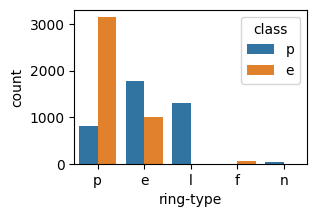



{'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'}

spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64



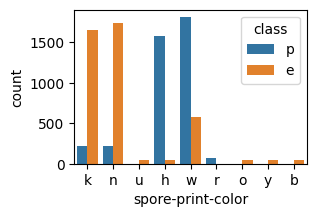



{'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'}

population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: count, dtype: int64



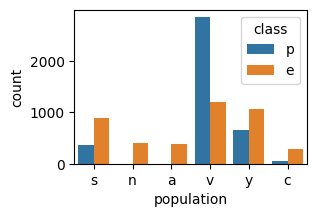



{'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}

habitat
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: count, dtype: int64



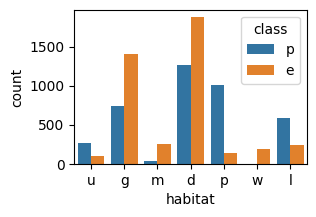

In [15]:
for col in cols:
    print(legend[col])
    print()
    print(df[col].value_counts())
    print()
    plt.figure(figsize=(3,2))
    sns.countplot(data=df, x=col, hue='class')
    plt.show()
    print()
    print('='*50)
    print()

# Data Preprocessing
I don't want to o too much data preprocessing here, as there's only encoded data. However, I would like to see if it's possible to remove some columns to speed up the model, based on columns' collinearity.

By displaying the correlation matrix heatmap for the first time, I noticed something strange with the 'veil-type' column: it was empty. So I analyzed its content, and found out it was full of 0's, or it was a constant. As constant variables are not helpful to the model, I'll drop it here below.

In [16]:
encoded_data = encoded_data.drop('veil-type', axis=1)
df = df.drop('veil-type', axis=1)
cols.remove('veil-type')

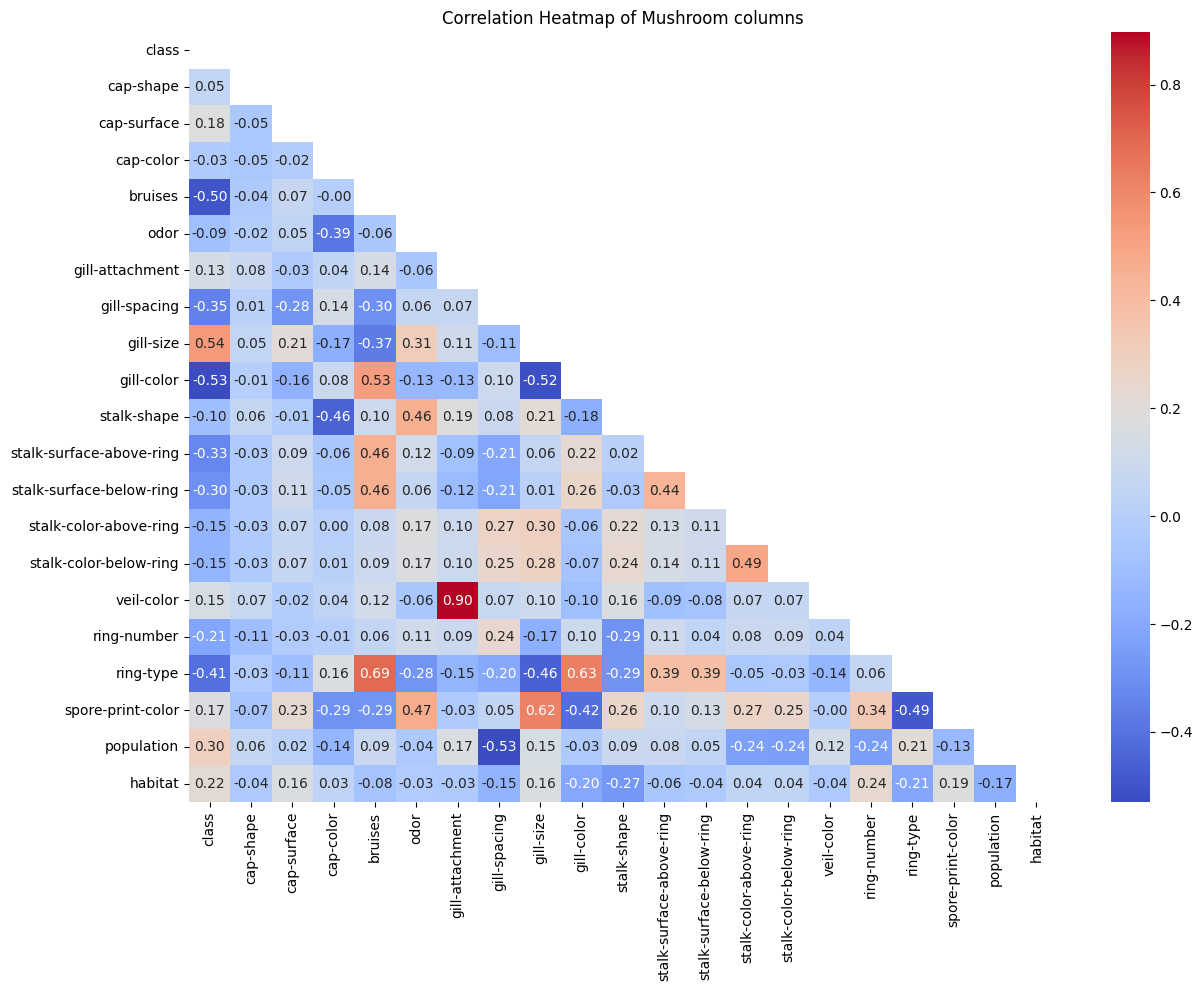

In [17]:
corr = encoded_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotting the heatmap for the lower triangle
plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Mushroom columns')
plt.show()

Great! It looks like the only two variables highly correlated are 'veil-color' and 'gill-attachment', so I will remove one of the two:

In [18]:
encoded_data = encoded_data.drop('veil-color', axis=1)
df = df.drop('veil-color', axis=1)
cols.remove('veil-color')

# ML models comparisons

Let's run some models and compare them with each other to choose the best!
</br>
</br>

## Logistic Regression
Since it's a classification problem (we need to find out wether the mushroom is poisonus or not), I'll run a Logistic Regression model first.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
# Create X and y
X =  encoded_data.drop('class', axis=1)
y = encoded_data['class']

# split them in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Create the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Find predictions
predictions = logreg.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy: .2f}')

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions))

# Confusion Matrix
print('\nCofusion Matrix')
print(confusion_matrix(y_test, predictions))

Accuracy:  0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       843
           1       0.94      0.94      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625


Cofusion Matrix
[[796  47]
 [ 48 734]]


Not bad! Let's try other models to see which ones perform the best
</br>
</br>
# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of Random Forest Classifier: {accuracy}')

Accuracy of Random Forest Classifier: 1.0


Ok, it looks even better! 100% for the Random Forest Classifier vs. 94% from the Logistic regression. We could stop here, but let's see how does XGBoost performs:
</br>
</br>
# XGBoost

In [25]:
import xgboost as xgb

In [29]:
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, predictions)

print(f'Accuracy of XGB Classifier: {accuracy_xgb}')

Accuracy of XGB Classifier: 1.0
